# Analysis of SME Survey Data.
According to a report by 'Complete Controller', SMEs (Small and Medium Enterprises) contribution to the GDP (gross domestic product) of economies in developed and developing countries account for about three-fourths of the national treasury. However, their contribution in developing countries is significantly higher. One of the major factors is that they aim to fill the gap created by unemployment. The income gap between the rich and the poor reduces with emerging SMEs or entrepreneurship.


### Objective
Funding is said to be a major problem with SMEs in Nigeria. However, the problem is not so much the sources of funds but the accessibility. It is common knowledge that businesses at different points require funding, whether at start-up points or at the point of expansion. On this notebook, a dataset containing answers to a SME Survey are analysed, with the main objective of confirming said assumption and providing insights on how to acess funding. For this, some minor objectives can be defined, made in the form of questions:

What is the most challenging thing about owning a business?

How likely are you to seek funding from an investor?

How would you feel about a platform that connects you with investors for funding?

Would you prefer this platform to be an app or website?


### Libraries
Here, all the libaries and frameworks used throughout the notebook are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data
First, let's read the data and make an initial check on its format and presence of null values.

In [2]:
df = pd.read_excel('Funding Survey for SMEs (Responses).xlsx')

### Renaming columns for easy readability

In [3]:
df.columns = ['timestamp', 'email', 'business_owner', 'registered_business','greatest_challenge', 'funding_source', 'likely_to_seek_funding', 'when_to_seek_funding', 'factors_to_consider', 'sentiment', 'preferred_platform', 'investment_frequency', 'investment_experience', 'investment_type', 'investment_source', 'dissatisfaction_reason', 'considerations_before_investing', 'platform_feeling', 'preferred_startup_platform']

### Initial Analysis 
Dropping columns that are not relevant to the Analysis.

In [4]:
df.drop(columns=['timestamp', 'email', 'business_owner','when_to_seek_funding', 'registered_business', 'factors_to_consider', 'funding_source', 'investment_experience', 'investment_type', 'investment_source','investment_frequency', 'dissatisfaction_reason', 'considerations_before_investing', 'platform_feeling', 'preferred_startup_platform'], inplace=True)

In [5]:
print(df.dtypes)

greatest_challenge        object
likely_to_seek_funding    object
sentiment                 object
preferred_platform        object
dtype: object


In [6]:
print(df.shape)

(54, 4)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   greatest_challenge      51 non-null     object
 1   likely_to_seek_funding  51 non-null     object
 2   sentiment               51 non-null     object
 3   preferred_platform      51 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


Checking and dropping null values

In [8]:
df.isnull().sum()

greatest_challenge        3
likely_to_seek_funding    3
sentiment                 3
preferred_platform        3
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

greatest_challenge        0
likely_to_seek_funding    0
sentiment                 0
preferred_platform        0
dtype: int64

Checking and dropping duplicated values

In [11]:
df.duplicated().sum()

3

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

Reset Index

In [14]:
df.reset_index(inplace=True, drop=True)

In [15]:
df.head()

,greatest_challenge,likely_to_seek_funding,sentiment,preferred_platform
0,Access to capital,Likely,Good,App. Apps are quite easy to navigate or I pers...
1,Access to capital,Less likely,Good,Website. Detailed Access.
2,Access to capital,Likely,Good,App. It's always easier for me to access apps
3,Electricity and power supply,Likely,Good,App. Easy to navigate
4,Access to capital,Likely,Good,Both because of easy access


Clean preferred_platform column to regularize data

In [16]:
df['preferred_platform'] = df['preferred_platform'].apply(lambda x: x.split()[0].strip().rstrip('.'))

Fill missing data using 'bfill' and 'ffill' methods

In [27]:
df['preferred_platform'] = df['preferred_platform'].fillna(method='ffill').fillna(method='bfill').apply(lambda x: x if x in ['Website', 'App', 'Both'] else df['preferred_platform'].iloc[df['preferred_platform'].eq(x).idxmax()-1])

In [18]:
print(df.shape)

(48, 4)


### Exploratory Analysis
After pre-processing the data, an initial exploratory analysis can be done to obtain a first understanding of the data. For this, let´s focus on the more general characteristics of the costumers, starting with Greatest_Challenge

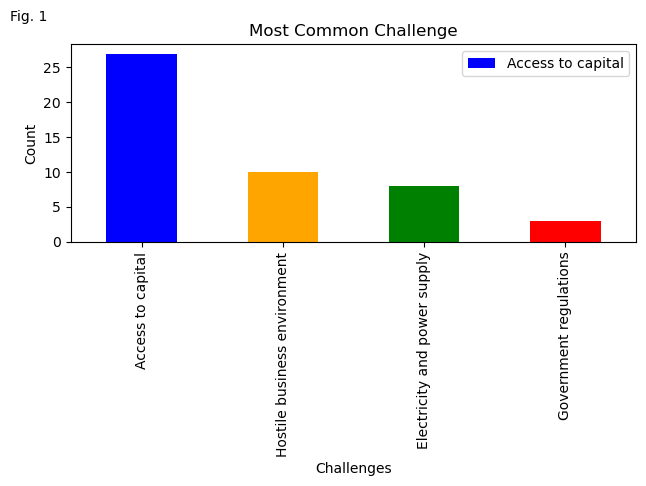

From the chart, it is clear that the most common challenge faced by the businesses is Access to capital, with the frequency of this challenge being significantly higher than the other challenges.


In [19]:
challenge_counts = df['greatest_challenge'].value_counts()

# create a vertical bar chart of the frequency table
challenge_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])

# add chart labels and title
plt.xlabel('Challenges')
plt.ylabel('Count')
plt.title('Most Common Challenge')

# rotate x-axis labels for better readability and avoid overlapping
plt.xticks(rotation=90)
plt.legend(['Access to capital', 'Hostile business environment', 'Electricity and power supply', 'Government regulations'])

# adjust padding to make labels more readable
plt.tight_layout(pad=1)
plt.figtext(0.0, 1, "Fig. 1", fontsize=10, ha="left", va="top")

plt.show()

print('From the chart, it is clear that the most common challenge faced by the businesses is Access to capital, with the frequency of this challenge being significantly higher than the other challenges.')

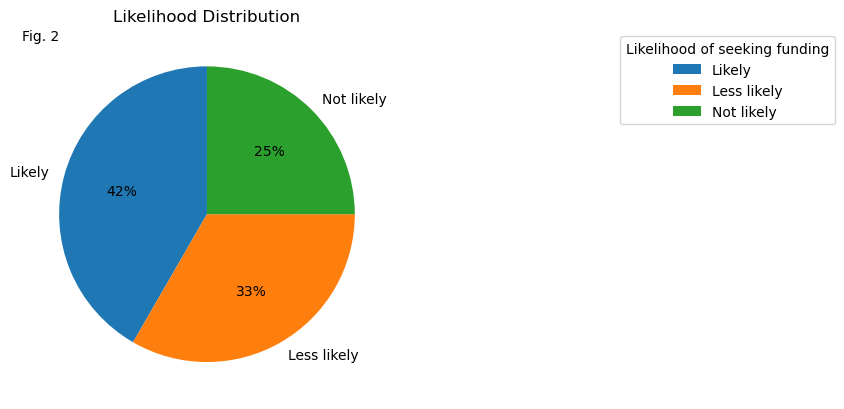

According to the chart, the majority of entrepreneurs in the sample (42%) are likely to seek funding for their businesses.   This suggests that access to capital is a significant challenge for many entrepreneurs.


In [22]:
# Create a pie chart
labels = df['likely_to_seek_funding'].value_counts().index.tolist()
values = df['likely_to_seek_funding'].value_counts().tolist()

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)
ax.set_title('Likelihood Distribution')

# Add legend
ax.legend(title='Likelihood of seeking funding', loc='upper left', bbox_to_anchor=(1.6, 1))
ax.text(0.00, 1, 'Fig. 2', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left')
plt.show()
print('According to the chart, the majority of entrepreneurs in the sample (42%) are likely to seek funding for their businesses.   This suggests that access to capital is a significant challenge for many entrepreneurs.')

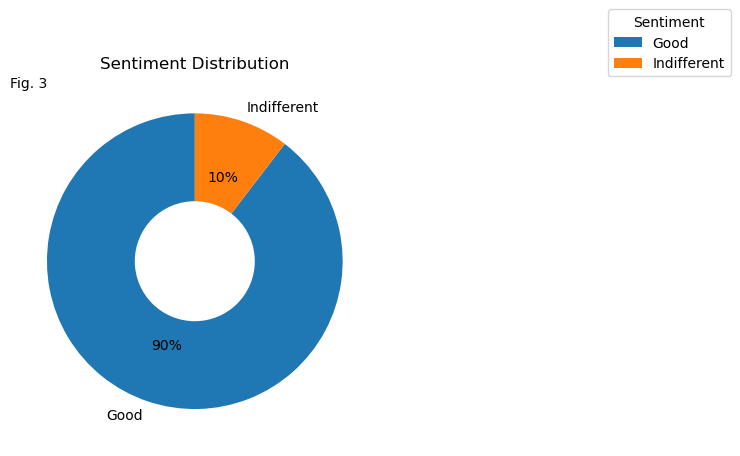

This chart shows majority of entrepreneurs are in support of a platform that enables easy accessibility of funding for their businesses.


In [23]:
# Create a doughnut chart of the sentiment distribution
labels = df['sentiment'].value_counts().index.tolist()
values = df['sentiment'].value_counts().tolist()

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw circle to create doughnut chart
centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
fig.gca().add_artist(centre_circle)

# Add legend
ax.legend(title='Sentiment', loc='upper left', bbox_to_anchor=(1.6, 1.2))
ax.set_title('Sentiment Distribution')
ax.text(0.00, 1, 'Fig. 3', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left')
plt.show()

print('This chart shows majority of entrepreneurs are in support of a platform that enables easy accessibility of funding for their businesses.')

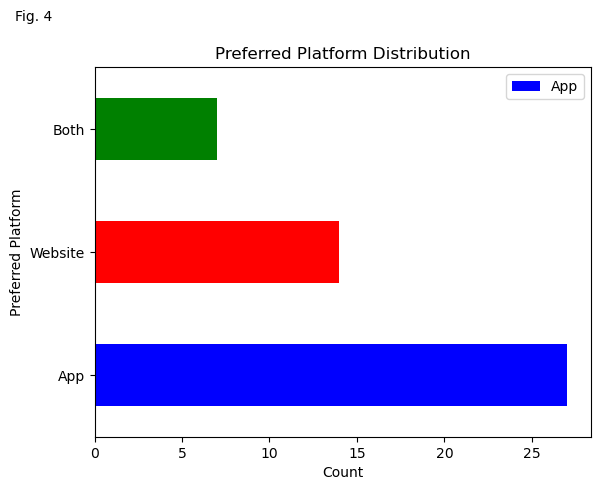

This chart clearly shows that the App is the most preferred platform among entrepreneurs.


In [28]:
platform_counts = df['preferred_platform'].value_counts()

# create a horizontal bar chart of the frequency table
platform_counts.plot(kind='barh',  color=['blue', 'red', 'green'])

# add chart labels and title
plt.xlabel('Count')
plt.ylabel('Preferred Platform')
plt.title('Preferred Platform Distribution')
plt.legend(['App', 'Website', 'Both'])

plt.figtext(0.0, 1, "Fig. 4", fontsize=10, ha="left", va="top")
plt.show()

print('This chart clearly shows that the App is the most preferred platform among entrepreneurs.')


# Data Analysis Report:

#### Introduction:
The aim of this Data Analysis report is to provide an overview of the SME Survey data collected through a Google form. The data consists of 54 responses on various topics like greatest challenges faced by SMEs, their likelihood of seeking funding, sentiments on having a funding platform and their preferred platforms for investing in startups.This report presents the findings of the survey and provides insights into the funding landscape for SMEs.

#### Data Gathering:
The data was gathered from a survey conducted to gather information about funding for SMEs. The survey was conducted using an online form and the data was exported to an Excel file. It is important to note that the survey was distributed through a specific channel and may not be fully representative of all SMEs.

#### Data Cleaning:
The data was cleaned and preprocessed using pandas, numpy, and matplotlib libraries. The following steps were taken to clean the data:

The column names were renamed to be more descriptive, such as renaming "What is the most challenging thing about owning a business?" to "greatest_challenge" and "How likely are you to seek funding from an investor?" to "likelihood_of_seeking_funding".

Columns that were not required for the analysis were removed, such as any columns that did not provide relevant information.

Rows with missing values were dropped, as missing values could skew the results of the analysis.

Duplicate rows were removed, as duplicate data can also skew the results of the analysis.

The "preferred_platform" column was cleaned to extract the first element and remove any unnecessary characters, such as converting "website and app" to "website".

The initial dataset contained 54 entries and 4 columns. After dropping the duplicated, and null values, we had 48 entries for analysis.

#### Data Analysis:
The Data Analysis includes visualizations of four columns in the dataset, including the greatest challenge faced by SMEs, their likelihood of seeking funding, their Sentiments toward having a platform that eases their access to funding, their preferred platform. The following are the key findings:


Greatest Challenge:
The challenges listed in the legend are "Access to capital", "Hostile business environment", "Electricity and power supply", and "Government regulations".

The bar chart (fig. 1) shows that "Access to capital" is the most common challenge faced by the businesses surveyed, followed by "Hostile business environment" and "Electricity and power supply". "Government regulations" is the least common challenge, based on the data presented. The x-axis labels have been rotated to 90 degrees to make them more readable and avoid overlapping. The chart title and axis labels provide context and information about the data presented.


Likelihood of Seeking Funding: 
According to the pie chart (fig. 2), the majority of entrepreneurs in the sample (43%) are likely to seek funding for their businesses. This suggests that access to capital is a significant challenge for many entrepreneurs.

On the other hand, less likely entrepreneurs make up the remaining 33% of the sample and entrepreneurs who are unlikely, make up 25% of the sample. These entrepreneurs may have alternative sources of funding or may be relying on revenue generated from their businesses to support growth.

This indicates that entrepreneurs in this sample have a clear understanding of their funding needs and are either actively seeking funding or not.

Overall, this data suggests that access to capital is a critical challenge for many entrepreneurs, and a significant portion of them are actively seeking funding to support their businesses.


Sentiment:
The doughnut chart(fig. 3) shows the sentiment distribution of the entrepreneurs surveyed. The sentiment is divided into three categories: Good, Indifferent, and Not Likely.

The chart shows that the majority of entrepreneurs surveyed have a positive sentiment towards the topic of discussion, with 90% of the respondents having a 'Good' sentiment. Meanwhile, 10% of the respondents were indifferent, and no respondent had a 'Not Likely' sentiment.

Based on the sentiment distribution, it is clear that entrepreneurs are in support of a platform that enables easy accessibility of funding for their businesses. This can be seen in the majority of respondents having a positive sentiment towards the topic.


Preferred platform:
The results are visually represented using a horizontal bar chart (fig. 4). The chart clearly shows that the App is the most preferred platform among entrepreneurs, followed by the Website and Both.

The study provides insights into the platform preferences of entrepreneurs and can be useful for businesses that offer services or products to entrepreneurs. The insights gained from this analysis can help businesses tailor their offerings to suit the preferences of entrepreneurs and better target them in their marketing efforts.

Overall, the findings of the study suggest that businesses should focus on developing mobile apps as part of their offerings, as this is the most preferred platform among entrepreneurs. However, it is also important to note that a significant number of entrepreneurs still prefer websites, and both platforms can be important for businesses to consider when developing their digital strategies.


#### Discussion:
In the exploratory analysis section, the report states that the most common challenge faced by businesses is access to capital. This finding has important implications for small and medium-sized enterprises (SMEs), which often struggle to secure financing for their operations and growth. Without adequate access to capital, SMEs may be unable to invest in new technologies, expand their operations, or hire additional staff, all of which are essential for their long-term success.

There are several possible reasons why access to capital is the most common challenge reported by SMEs in this survey. One possible explanation is that traditional lending institutions, such as banks, may be reluctant to lend to SMEs due to perceived risks and uncertainties. As a result, SMEs may have to rely on alternative sources of financing, such as venture capital, angel investors, or crowdfunding platforms. However, these sources of financing may be less accessible or more expensive than traditional bank loans, which can make it difficult for SMEs to obtain the capital they need.

Overall, the finding that access to capital is the most common challenge faced by SMEs underscores the need for policies and programs that support SMEs' access to financing and provide them with the tools and resources they need to effectively manage their finances and grow their businesses.


#### Recommendations:
Based on the findings of this data analysis, it is recommended that financial institutions explore the use of digital finance solutions to support SMEs. Financial institutions should also continue to develop more innovative financing solutions to cater to the needs of SMEs. Additionally, policymakers should review existing regulations and explore the development of policies that can improve SMEs access to capital.

#### References:
Issues facing SMEs in Nigeria by Nigeriahow 
https://howng.com/issues-facing-smes-in-nigeria